In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import glob
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils import load_img, img_to_array
import os as os 

In [2]:
#Define the shape for the test inputs

image_size = (100, 100)
input_shape = (None,) + image_size + (3,)
batch_size = 32

In [3]:
#Loading the test data
test_dir = pathlib.Path('Data/test')

In [4]:
#Creating the test dataset

test_ds = image_dataset_from_directory(
    test_dir, 
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    seed = 42,
)

Found 539 files belonging to 3 classes.


In [5]:
#Loading trained model
final_model = keras.models.load_model('increased_shape.keras')

final_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 batch_normalization_40 (Bat  (None, 100, 100, 64)     256       
 chNormalization)                                                
                                                                 
 re_lu_40 (ReLU)             (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 50, 50, 128)     

In [6]:
#Evaluating model on test set

final_model.evaluate(test_ds)

17/17 [==============================] - 3s 126ms/step - loss: 0.4632 - accuracy: 0.8571


[0.4632072448730469, 0.8571428656578064]

In [7]:
#Extract class names for sample predictions

class_names = test_ds.class_names

In [8]:
#Loading the specified test samples

img_paths = ['Data/test/crack/test_crack.jpg', 
            'Data/test/missing-head/test_missinghead.jpg',
            'Data/test/paint-off/test_paintoff.jpg' 
]

test_imgs = []

for img in img_paths:
    img_array = img_to_array(load_img(img, target_size=image_size))
    img_batch = np.expand_dims(img_array, axis=0)
    test_imgs.append(img_batch)

In [9]:
#Making predictions on the sample images

predictions = []

for img in test_imgs:
    predictions.append(final_model.predict(img))

predicted_classes = [class_names[np.argmax(pred)] for pred in predictions]

for pred_class in predicted_classes:
    print(pred_class)

1/1 [==============================] - 0s 27ms/step
crack
missing-head
paint-off


In [10]:
#Create font dicts for plots

title_font = {'family': 'arial', 'color' :'black', 'size': 20}

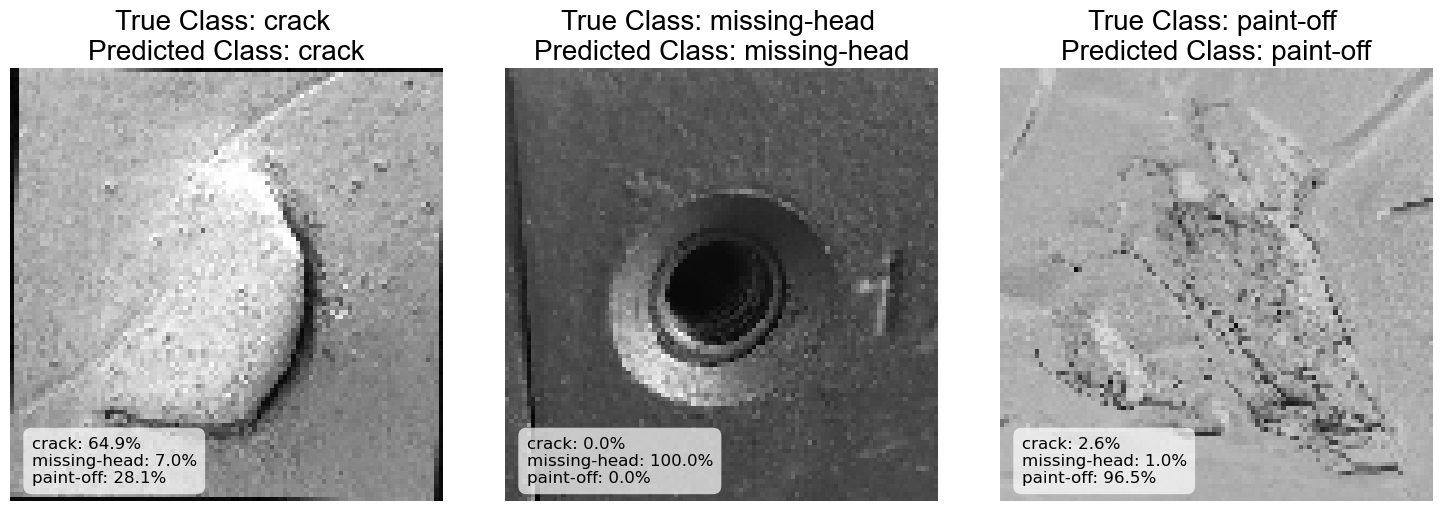

In [11]:
#Display predictions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img_path, pred_class, pred_probs in zip(axes, img_paths, predicted_classes, predictions):
    img = load_img(img_path, target_size=image_size)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True Class: {img_path.split('/')[-2]} \nPredicted Class: {pred_class}", fontdict=title_font)

    prob_str = "\n".join([f"{class_name}: {100*prob:.1f}%" for class_name, prob in zip(class_names, pred_probs.flatten())])

    ax.text(0.05, 0.15, prob_str, transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

    
plt.tight_layout()
plt.show()